# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [0]:
from numpy.random import seed
seed(10)
from tensorflow import set_random_seed
set_random_seed(20)

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


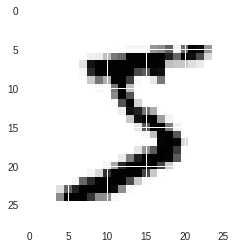

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
'''datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)'''

'''datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=8,
    width_shift_range=0.08,
    height_shift_range=0.08,
    shear_range=0.3,
    zoom_range=0.08)'''

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    width_shift_range=0.08,
    height_shift_range=0.08,
    rotation_range=8,
    shear_range=0.3,
    zoom_range=0.08)

In [0]:
datagen.fit(X_train)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(4, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(5, 3, 3, activation='relu', input_shape=(26,26,4)))
model.add(BatchNormalization(axis=-1))

model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(24,24,5)))

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(22,22,8)))
model.add(BatchNormalization(axis=-1))

model.add(Convolution2D(12, 3, 3, activation='relu', input_shape=(20,20,10)))

model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(18,18,12)))
model.add(BatchNormalization(axis=-1))

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(16,16,14)))

model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(14,14,16)))
model.add(BatchNormalization(axis=-1))

model.add(Convolution2D(15, 3, 3, activation='relu', input_shape=(12,12,18)))

model.add(Convolution2D(14, 3, 3, activation='relu', input_shape=(10,10,15)))
model.add(BatchNormalization(axis=-1))


model.add(Convolution2D(10, 1, activation='relu', input_shape=(8,8,14)))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(4, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), activation="relu", input_shape=(26, 26, 4...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(24, 24, 5...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(22, 22, 8...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 5)         185       
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 5)         20        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 8)         368       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 10)        730       
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 10)        40        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 12)        1092      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
#model.fit(X_train, Y_train, batch_size=32, nb_epoch=30, verbose=1)
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), epochs=40, verbose=1)

Epoch 1/40
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3942 - acc: 0.8737
Epoch 2/40
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1538 - acc: 0.9524
Epoch 3/40
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1220 - acc: 0.9626
Epoch 4/40
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1085 - acc: 0.9670
Epoch 5/40
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0978 - acc: 0.9709
Epoch 6/40
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0896 - acc: 0.9731
Epoch 7/40
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0825 - acc: 0.9745
Epoch 8/40
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0799 - acc: 0.9754
Epoch 9/40
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0734 - acc: 0.9779
Epoch 10/40
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0704 - acc: 0.9787
Epoch 11/

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 2s 172us/step


In [0]:
print(score)

[0.028639891363773495, 0.9925]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.34529791e-11 9.02300901e-09 1.85091051e-06 1.11200826e-08
  3.56610386e-08 1.11708949e-11 2.45977706e-16 9.99997258e-01
  2.85703631e-11 7.84455437e-07]
 [1.87023073e-08 5.02567616e-07 9.99997735e-01 1.00063087e-08
  4.24201563e-09 7.56873644e-12 1.16092096e-07 1.63584457e-06
  3.85067622e-08 3.72997966e-10]
 [2.95731667e-07 9.99988675e-01 1.55107458e-07 5.28789279e-09
  4.83148688e-06 2.05996020e-08 7.48930020e-08 1.05549441e-06
  8.71529053e-08 4.94528877e-06]
 [9.99505401e-01 2.38367184e-15 3.77388687e-07 6.19916278e-08
  2.91633114e-07 4.66179955e-07 4.06653038e-04 1.63777325e-10
  1.93039195e-05 6.74126422e-05]
 [7.02715965e-07 2.30435851e-10 1.88505910e-05 3.39169333e-08
  9.99920845e-01 5.60091351e-08 9.92949026e-06 9.99941130e-10
  4.87817670e-05 9.01029068e-07]
 [4.06967082e-08 9.99990344e-01 7.65021966e-08 3.20950044e-10
  3.69046143e-06 6.15857199e-10 2.44148008e-08 4.73517872e-07
  3.69060196e-08 5.30120951e-06]
 [3.11854709e-11 3.36044849e-07 9.74577716e-08 1.15629717e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7fc49baac9e8>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7fc4a0f4eb00>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7fc4a0f4eac8>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7fc49bdd22e8>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7fc49bce7cf8>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7fc49bc00fd0>,
 'conv2d_1': <keras.layers.convolutional.Conv2D at 0x7fc4a0f4e780>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0x7fc49bbe4240>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x7fc49baf2c88>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x7fc49baf2550>,
 'conv2d_2': <keras.layers.convolutional.Conv2D at 0x7fc4a0f4e748>,
 'conv2d_3': <keras.layers.convolutional.Conv2D at 0x7fc4a0f68908>,
 'conv2d_4': <keras.layers.convolutional.Conv2D at 0x7fc4

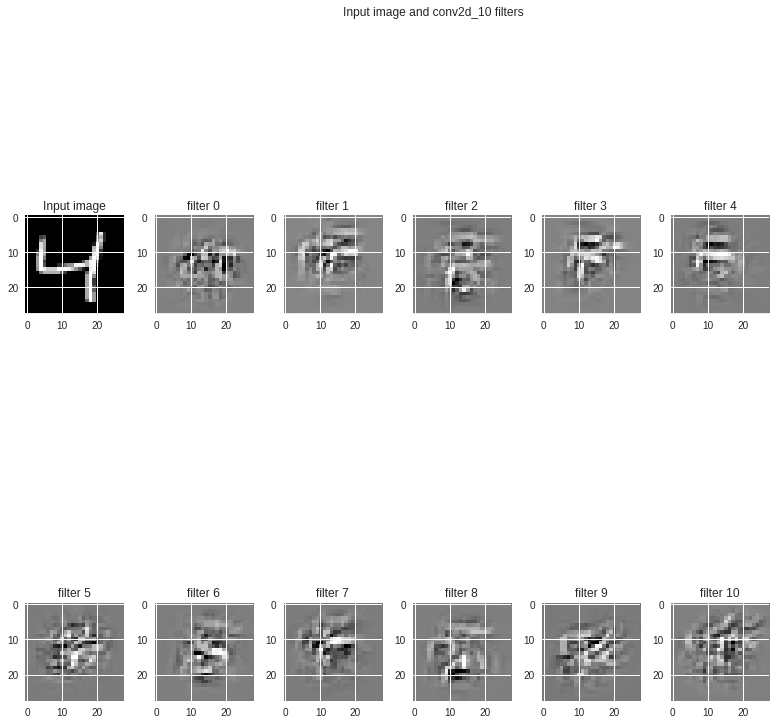

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()